#### Exploratory Data Analysis

In [1]:
# dataset url - https://urbansounddataset.weebly.com/download-urbansound8k.html

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display

In [2]:
!dir

 Volume in drive E is DATA
 Volume Serial Number is 26FD-A99C

 Directory of e:\Audio Classification using Deep Learning

16-07-2024  19:38    <DIR>          .
16-07-2024  19:37           506,862 Audio Classification.ipynb
10-07-2024  15:11    <DIR>          UrbanSound8K
               1 File(s)        506,862 bytes
               2 Dir(s)  216,514,387,968 bytes free


In [3]:
# example of dog sound
filename = 'UrbanSound8K/dog_bark.wav'
ipd.Audio(filename)

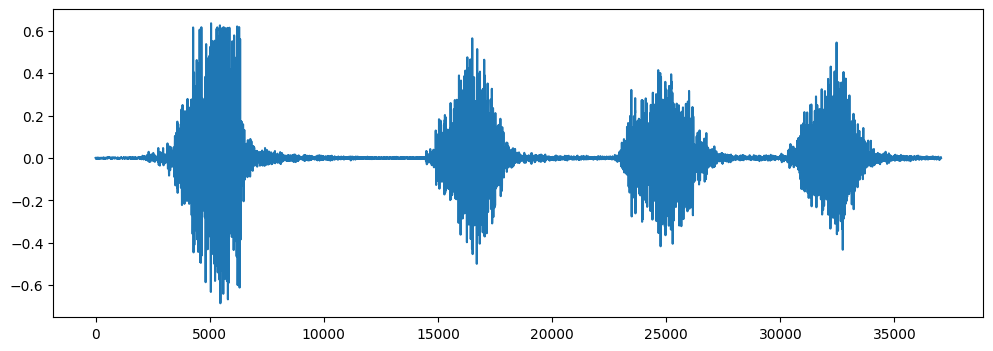

In [4]:
# read the file using librosa
data, sample_rate = librosa.load(filename)
plt.figure(figsize=(12,4))
plt.plot(data)

In [5]:
data

array([ 2.15323707e-05, -4.24107217e-04, -9.02767992e-04, ...,
        9.89240361e-04,  1.23555539e-03,  1.14129674e-04], dtype=float32)

In [6]:
sample_rate

22050

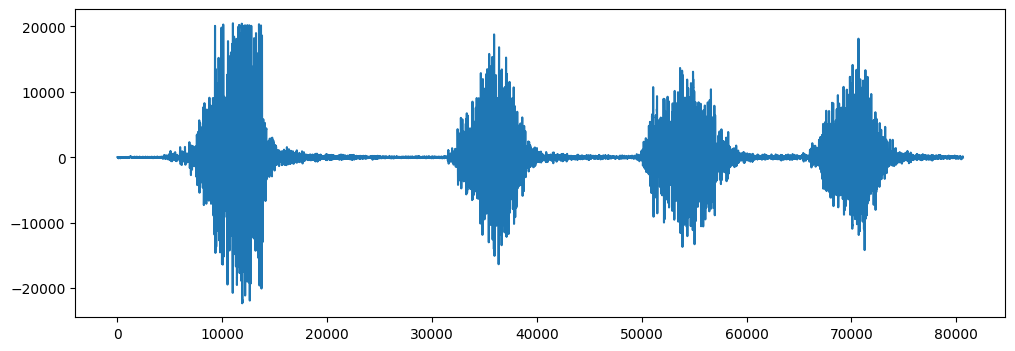

In [7]:
# read the audio using scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [8]:
wave_audio

array([  3,  -3, -15, ...,  21,   4, -16], dtype=int16)

In [9]:
wave_sample_rate

48000

In [10]:
# lets read another audio  using librosa
audio_file_path = 'UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [11]:
librosa_audio_data

array([ 0.00331575,  0.00467553,  0.00361099, ..., -0.00376796,
       -0.00347471, -0.00357828], dtype=float32)

In [12]:
librosa_sample_rate

22050

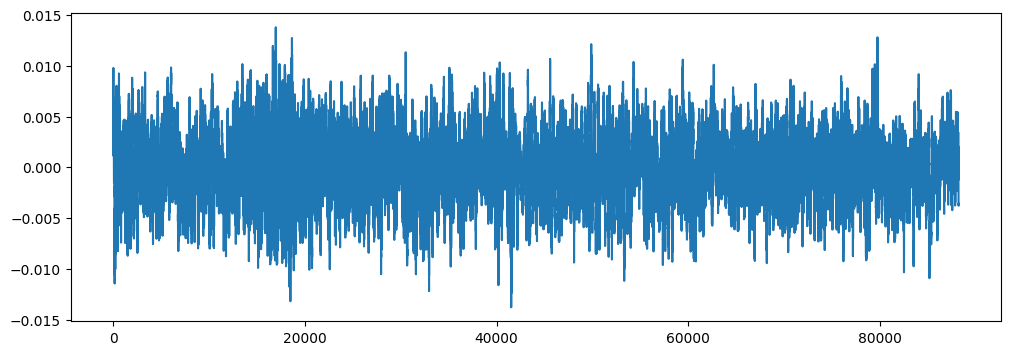

In [13]:
# Lets plot the librosa audio data
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [14]:
# lets read with scipy
wave_sample_rate, wave_audio = wav.read(audio_file_path)
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

In [15]:
wave_sample_rate

44100

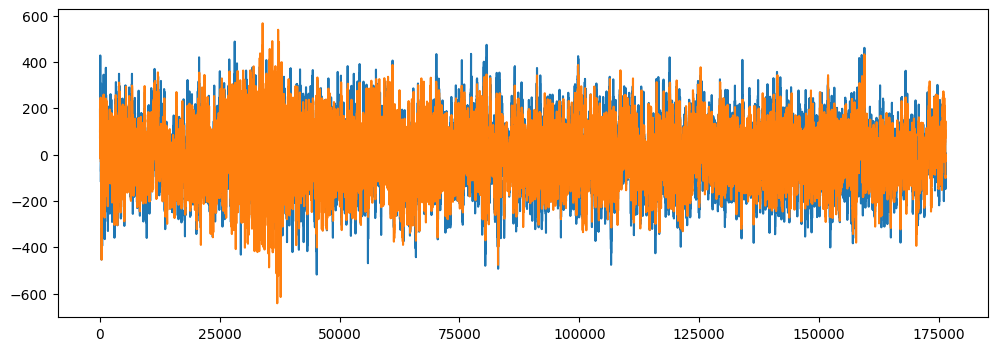

In [16]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

<i>Observation : librosa is good for processing audio data<br>
Here librosa converts the signal to mono, meaning the channel will always be 1 and also normalizes the audio data</i>

In [17]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [18]:
# check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

#### Data Preprocessing

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

refer this video to understand in detail : https://www.youtube.com/watch?v=4_SH2nfbQZ8&t=0s

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [20]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682455e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-2.8760438e+00, -3.2479761e+00, -4.8965530e+00, ...,
        -5.2023613e-01,  3.5672503e+00,  7.4937558e+00],
       [-4.2968374e-01, -5.8838749e-01, -8.1724131e-01, ...,
         1.8340763e-01,  7.6732612e-01,  2.7120004e+00],
       [-1.1780634e+00,  6.9809413e-01,  6.3521609e+00, ...,
        -2.6221936e+00, -4.7912698e+00, -3.1826305e+00]], dtype=float32)

In [21]:
# this function will find mfccs scaled features of a audio file
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [22]:
import numpy as np
from tqdm import tqdm
import os

# specify the path
audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:55, 16.15it/s]c:\Users\admin\anaconda3\envs\myenv1\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [09:03, 21.06it/s]c:\Users\admin\anaconda3\envs\myenv1\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [09:03, 23.93it/s]c:\Users\admin\anaconda3\envs\myenv1\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:27, 15.39it/s]


In [23]:
# converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [24]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [25]:
X

array([[-2.1735526e+02,  7.0223389e+01, -1.3038527e+02, ...,
        -1.6930534e+00, -6.1698359e-01,  3.8600540e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489316e-01, -5.4468715e-01,  4.4632086e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140963e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
        -3.0292377e+00,  2.7170293e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903439e+01, ...,
        -7.9082437e+00, -1.6414585e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386460e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [26]:
X.shape

(8732, 40)

In [27]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
y.shape

(8732,)

In [29]:
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [30]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y.shape

(8732, 10)

In [32]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_train.shape

(6985, 40)

In [34]:
X_test.shape

(1747, 40)

In [35]:
y_train.shape

(6985, 10)

In [36]:
y_test.shape

(1747, 10)

#### Model Creation

In [37]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [39]:
# No of classes
num_labels = y.shape[1]
num_labels

10

In [40]:
model = Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [42]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [43]:
# training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 11.3316 - accuracy: 0.1201
Epoch 1: val_loss improved from inf to 2.29235, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 11.3316 - accuracy: 0.1201 - val_loss: 2.2923 - val_accuracy: 0.1139
Epoch 2/100
202/219 [==========================>...] - ETA: 0s - loss: 2.5582 - accuracy: 0.1204
Epoch 2: val_loss improved from 2.29235 to 2.28198, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5439 - accuracy: 0.1215 - val_loss: 2.2820 - val_accuracy: 0.1070
Epoch 3/100
205/219 [===========================>..] - ETA: 0s - loss: 2.3287 - accuracy: 0.1194
Epoch 3: val_loss improved from 2.28198 to 2.27228, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3285 - accuracy: 0.1193 - val_loss: 2.2723 - val_accuracy: 0.11

In [44]:
X_test.shape

(1747, 40)

In [45]:
predictions = model.predict(X_test)
predictions.shape

55/55 [==============================] - 0s 1ms/step


(1747, 10)

In [46]:
predicted_classes = np.argmax(predictions, axis=-1)
predicted_classes

array([5, 3, 4, ..., 1, 2, 0], dtype=int64)

#### Testing with a sample audio

1) Preprocess the new audio data
2) predict the classes
3) Invere transform your Predicted Label

In [47]:
filename = "UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-2.92937164e+02  1.23184319e+02 -1.78010731e+01 -1.94697933e+01
 -3.48717575e+01 -4.97947693e+00 -3.35929070e+01 -1.45469885e+01
 -1.09566488e+01  2.40524793e+00 -2.68108654e+00 -4.90553808e+00
 -1.10568361e+01  9.42309678e-01  5.58117151e+00  3.96217537e+00
 -1.43357861e+00 -5.29406929e+00 -6.70389128e+00 -8.87814879e-01
 -5.83871222e+00 -1.04018383e+01 -9.15907001e+00 -1.29951108e+00
 -5.62726140e-01  1.59159636e+00  3.24745893e+00  1.48637199e+00
  4.91334343e+00  2.75690794e+00 -6.43363655e-01 -1.91020870e+00
  4.44814920e-01  7.89779872e-02 -2.89156586e-01 -9.20092940e-01
 -1.92482626e+00  8.13530624e-01  1.19871974e+00  5.90302527e-01]
(40,)


In [48]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[[-2.92937164e+02  1.23184319e+02 -1.78010731e+01 -1.94697933e+01
  -3.48717575e+01 -4.97947693e+00 -3.35929070e+01 -1.45469885e+01
  -1.09566488e+01  2.40524793e+00 -2.68108654e+00 -4.90553808e+00
  -1.10568361e+01  9.42309678e-01  5.58117151e+00  3.96217537e+00
  -1.43357861e+00 -5.29406929e+00 -6.70389128e+00 -8.87814879e-01
  -5.83871222e+00 -1.04018383e+01 -9.15907001e+00 -1.29951108e+00
  -5.62726140e-01  1.59159636e+00  3.24745893e+00  1.48637199e+00
   4.91334343e+00  2.75690794e+00 -6.43363655e-01 -1.91020870e+00
   4.44814920e-01  7.89779872e-02 -2.89156586e-01 -9.20092940e-01
  -1.92482626e+00  8.13530624e-01  1.19871974e+00  5.90302527e-01]]
(1, 40)


In [49]:
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
predicted_label


1/1 [==============================] - 0s 14ms/step


array([3], dtype=int64)

In [50]:
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

array(['dog_bark'], dtype='<U16')